[<img src="https://user-images.githubusercontent.com/79705081/109483674-d3eea600-7a7f-11eb-9a25-58c50da4cde9.png">](http://edenlibrary.ai/)

# Crop Images Scarcity-Traditional Data Augmentation-1

## Instructions
1. Clone the repository.
2. Download the necessary datasets from Eden Repository:
   1. Tomato-29/OCT/2020-V1
3. Unzip dataset files and remove the zip files.
4. Create a folder called 'eden_data'.
5. Move the unzipped datasets into this folder.
6. The resulting directory structure should be:
    * eden_library_notebooks/
       * image_preprocessing/
          * crop_images_scarcity-traditional_data_augmentation-1.ipynb
       * eden_data/
          * Tomato-291020-Potassium deficiency-zz-V1-20210225103832
7. Install notebook dependencies by running:
    <pre><code>conda env create -f eden_transfer_learning.yml</code></pre>
8. Open the notebook: jupyter notebook
9. Run the code

**Note:** If you find any issues while executing the notebook, don't hesitate to open an issue on Github. We will reply you as soon as possible.

## Background (Go to [Bibliography](#references) for more)

In the agriculture, for the problem of **data scarcity**, several techniques have been used by researchers to create more images based on the available datasets. The one which is shown in this notebook is data augmentation by performing different geometric and colour transformations into the images (**Dyrmann et al., 2016; Mehdipour-Ghazi et al., 2017; Fuentes et al., 2017; **). Data augmentation is not only useful for improving the performance of the deep neural network, but also for reducing <a href="https://en.wikipedia.org/wiki/Overfitting">overfitting</a>.

With this **data augmentation** set of techniques, images can be **rotated** by various angles, **cropped**, **scaled**, **blurred**, **noised**, **gray-scaled**, or **mirrored**.

**UPDATES**

*  ***28/04/2021*** Changed the file structure, see instructions for details. ( **IMPORTANT** )
*  ***28/04/2021*** Upgraded read function to become OS agnostic. It now works for both Windows and Linux machines.

#### LIbrary Imports

In [3]:
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
from pathlib import Path
import random

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

%matplotlib inline

#### Auxiliar Functions

In [4]:
def read_data(path_list, im_size=(256,256)):
    
    X = []

    for path in path_list :
        for im_file in tqdm(glob(path + '*/*')):
            if im_file.lower().endswith("jpg"):
                try:
                    im = cv2.imread(im_file)
                    # Resize to appropriate dimensions.You can try different interpolation methods.
                    im = cv2.resize(im, im_size,interpolation=cv2.INTER_LINEAR)
                    # By default OpenCV read with BGR format, return back to RGB.
                    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                    X.append(im)
                except Exception as e:
                    # In case annotations or metadata are found
                    print("Not a picture")
    
    X = np.array(X, np.uint8)# Convert list to numpy array.
    
    return X

In [3]:
def plot_sample(images):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images[random.randint(0, images.shape[0]-1)])

In [4]:
def plot_augmented_sample(images):
    nb_rows = 10
    nb_cols = 10
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(16, 16))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images[random.randint(0, images.shape[0]-1)])

#### Experimental constants

In [5]:
IM_SIZE = (256, 256)
# Datasets' paths we want to work on.
PATH_LIST = ['eden_data/Tomato-291020-Potassium deficiency-zz-V1-20210225103832']

In [7]:
i=0
for path in PATH_LIST:
    #Define paths in an OS agnostic way.
    PATH_LIST[i] = str(Path(Path.cwd()).parents[0].joinpath(path)) 
    i=+1
X = read_data(PATH_LIST, IM_SIZE)
y = np.array([0] * X.shape[0])
print("\n Current Number of Images:", np.array(X).shape[0])

100%|██████████| 13/13 [00:00<00:00, 31.42it/s]
 Current Number of Images: 12



#### Showing some original images

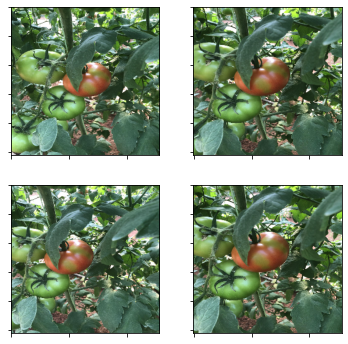

In [7]:
plot_sample(X)

#### Data augmentation with Keras

In [8]:
idg = ImageDataGenerator(
    rotation_range=360,
    zoom_range = 0.5, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.21],
    fill_mode='nearest', 
    cval=255
)

In [9]:
%%time
augmented_images = []
i = 0
for batch in idg.flow(X, y, batch_size=1):
    augmented_images.append(batch[0][0])
    i += 1
    if i > 99:
        break 

Wall time: 1.55 s


In [10]:
print("Current Number of Images:", np.array(augmented_images).shape[0])

Current Number of Images: 100


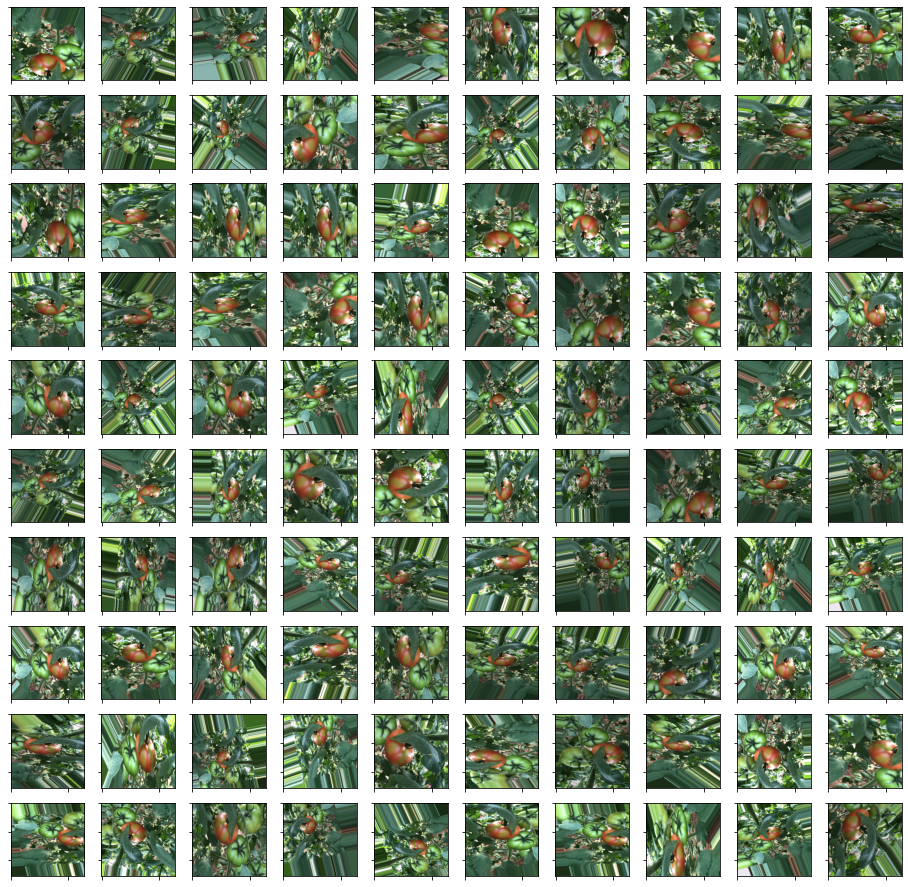

In [11]:
plot_augmented_sample(np.array(augmented_images).astype(np.uint8))

## Possible Extensions

1. Keras functionalities for data augmentation are much more. Try them!

## Bibliography
<a id='references'></a>
Binguitcha-Fare, A., & Sharma, P. (2019). Crops and weeds classification using Convolutional Neural Networks via optimization of transfer learning parameters.

Dyrmann, M., Karstoft, H., & Midtiby, H.S. (2016). Plant species classification using deep convolutional neural networks. Biosystems Engineering, 151, 72-80.

Mehdipour-Ghazi, M., Yanikoglu, B.A., & Aptoula, E. (2017). Plant identification using deep neural networks via optimization of transfer learning parameters. Neurocomputing, 235, 228-235.

Fuentes, A., Yoon, S., Kim, S., & Park, D. (2017). A Robust Deep-Learning-Based Detector for Real-Time Tomato Plant Diseases and Pests Recognition. Sensors (Basel, Switzerland), 17.

https://keras.io/api/preprocessing/image/